In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [87]:
def der_alpha(t, alpha, e): 
    return (2 * np.pi / (1 - e*e)**1.5) * (1 + e*np.cos(alpha))**2

In [88]:
class Alpha_wrt_Time(object):
    def __init__(self, e=0.0, split=10000):
        self.split = split
        t_span = (0, 1)
        t = np.linspace(0, 1, split+1)
        y0 = np.array([0])
        sol = solve_ivp(der_alpha, t_span, y0, t_eval = t, args = (e,))
        print(sol.y[0][0], sol.y[0][1], sol.y[0][-1])
        self.alpha_array = sol.y[0]
    
#     @property
    def alpha(self, time):
        t = time % 1
        n = time * self.split
        return self.alpha_array[int(n)]

In [89]:
a = Alpha_wrt_Time(e=0.6)

0.0 0.003141588777815011 6.203080338692604


In [90]:
a.alpha(0), a.alpha(0.0001), a.alpha(1)

(0.0, 0.003141588777815011, 6.203080338692604)

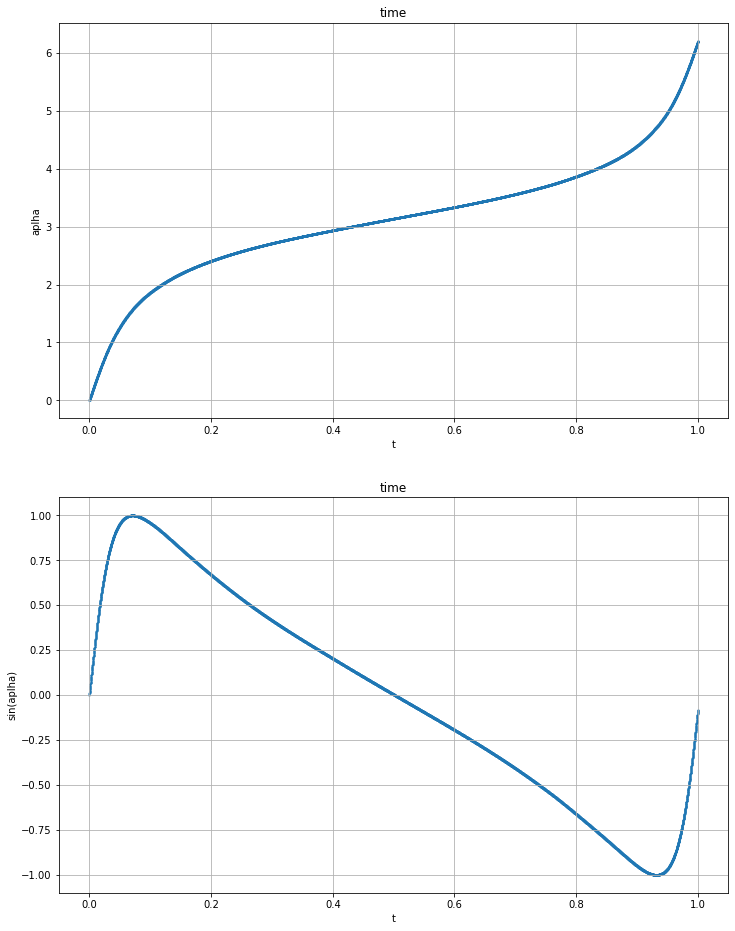

In [91]:
t = np.linspace(0, 1, a.split+1)
alphas = [a.alpha(time) for time in t]

fig = plt.figure(figsize = (12,16))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.scatter(t, alphas, s=1)
ax1.set_xlabel('t')
ax1.set_ylabel('aplha')
ax1.set_title('time')
ax1.grid(True)

ax2.scatter(t, np.sin(alphas), s=1)
ax2.set_xlabel('t')
ax2.set_ylabel('sin(aplha)')
ax2.set_title('time')
ax2.grid(True)

plt.show()